# Thompson Sampling

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [15]:
# takes a random draw of the data distribution
import random
all_users = 10000
number_of_ads = 10
ads_selected = []
numbers_of_rewards_1 = [0] * number_of_ads
numbers_of_rewards_0 = [0] * number_of_ads
total_reward = 0

for user in range(0, all_users):
    ad = 0
    # the ad that gets the most Klicks
    max_random = 0
    for i in range(0, number_of_ads):
        # random_beta wird für jede Ad berechnet. Die Ad mit dem höchsten random_beta wert hat die grösste Wahrscheinlichkeit auf einen Klick des Users
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    # liest Wert aus dem Dataset Array aus
    reward = dataset.values[user, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

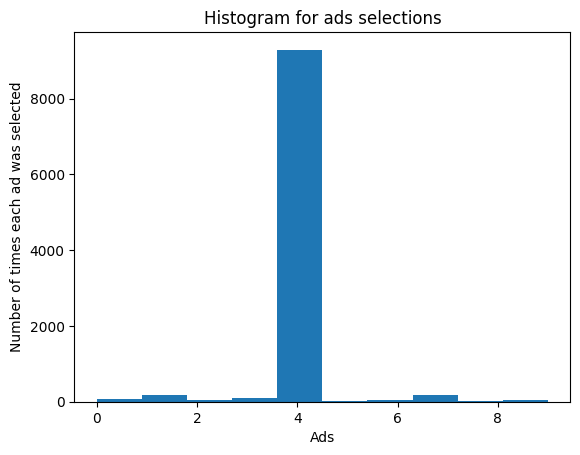

In [16]:
plt.hist(ads_selected)
plt.title('Histogram for ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()